In [17]:
from models import DQN
import torch
from utils import convert_multiple_layers,print_layer_information
from receptive_fields import fit_ep, plot_receptive_fields
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rl_net=DQN("DemonAttack-v0")

In [3]:
PATH='C:/Users/koester_lab/Documents/Maria/UdacityMachineLearningEngineerNanoDegree/dqn_model.pth'
rl_net.net.load_state_dict(torch.load(PATH))
PATH='C:/Users/koester_lab/Documents/Maria/UdacityMachineLearningEngineerNanoDegree/dqn_target_model.pth'
rl_net.target_net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [4]:
rl_net.run_n_episodes(env=rl_net.env,n_epsiodes=3,epsilon=0.0)

[140.0, 840.0, 100.0]

In [5]:
print_layer_information(rl_net)

0 CNN(
  (conv): Sequential(
    (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (head): Sequential(
    (0): Linear(in_features=3136, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=6, bias=True)
  )
)
1 Sequential(
  (0): Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
  (3): ReLU()
  (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (5): ReLU()
)
2 Conv2d(4, 32, kernel_size=(8, 8), stride=(4, 4))
3 ReLU()
4 Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
5 ReLU()
6 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
7 ReLU()
8 Sequential(
  (0): Linear(in_features=3136, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=6, bias=True)
)
9 Linear(in_featu

In [6]:
inds=[3,5,7]
activations=rl_net.activations
ts=convert_multiple_layers(inds,activations)

In [7]:
V,U=fit_ep(ts,n_ensembles=100,lam=0.1)

obtained 100 PCs in 1.7198 seconds
initialized 100 clusters with k-means in 1.8868 seconds
ensemble 0, time 16.59, nr neurons 7940, EV 0.2402
ensemble 25, time 53.55, nr neurons 43, EV 0.6763
ensemble 50, time 59.26, nr neurons 47, EV 0.6931
ensemble 75, time 63.88, nr neurons 27, EV 0.7036
ensemble 99, time 67.64, nr neurons 26, EV 0.7106
average sparsity is 0.0141


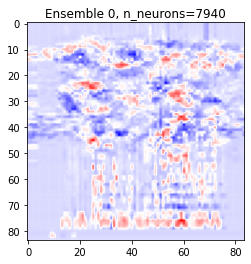

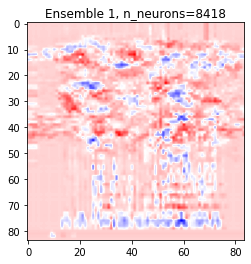

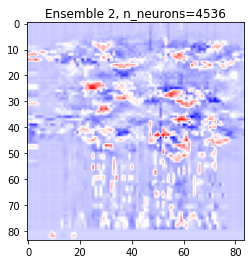

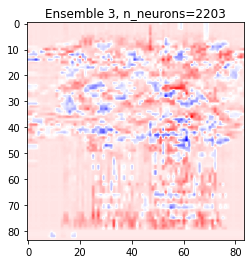

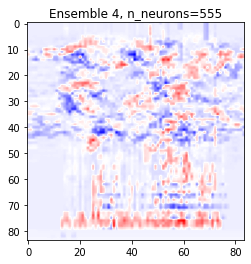

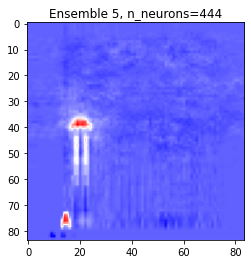

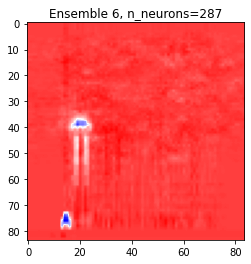

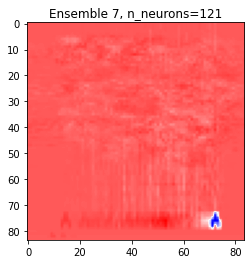

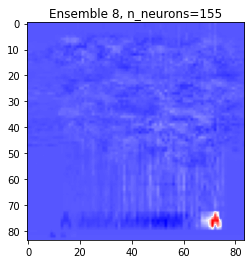

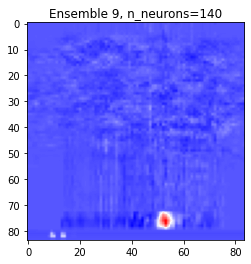

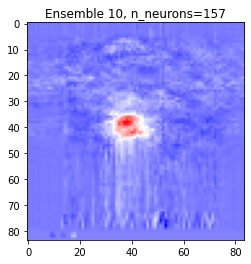

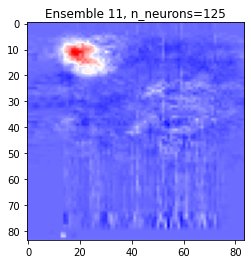

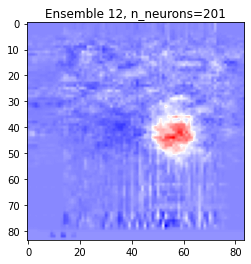

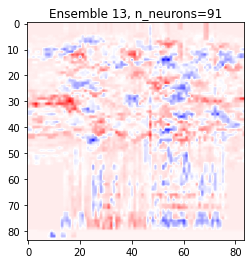

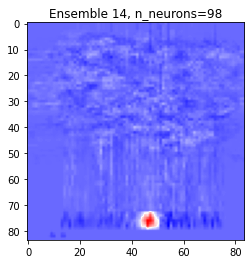

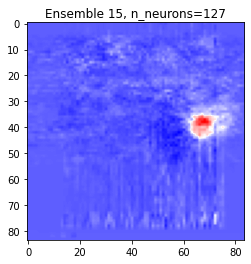

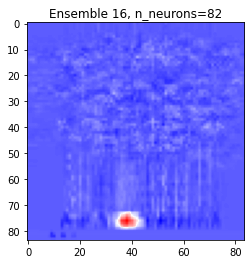

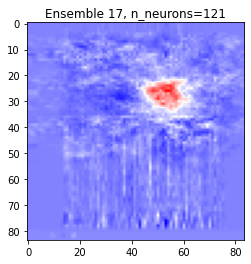

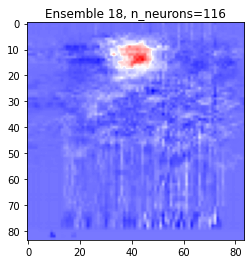

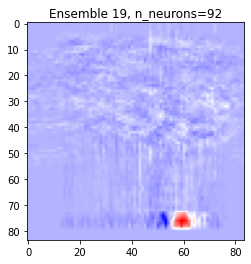

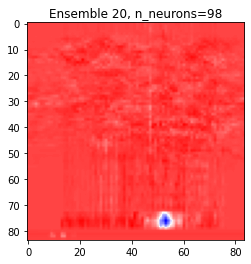

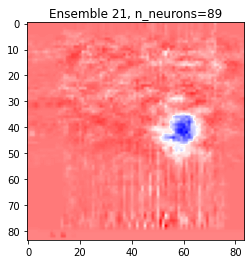

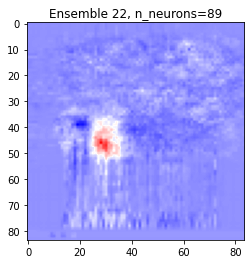

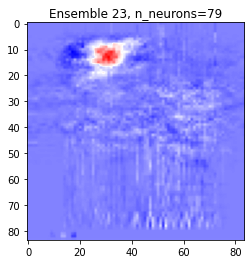

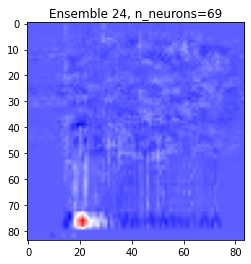

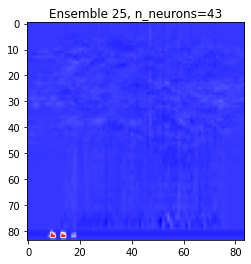

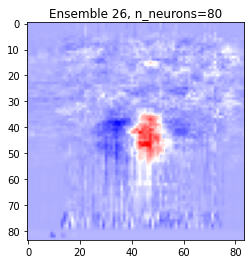

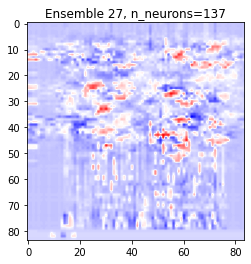

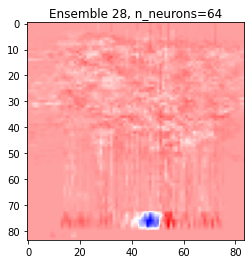

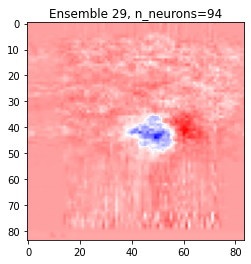

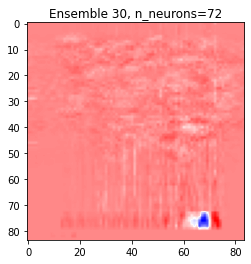

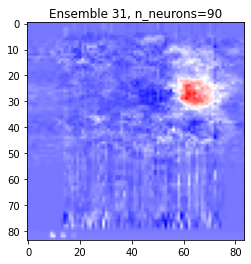

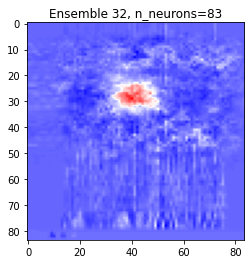

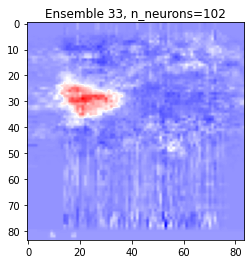

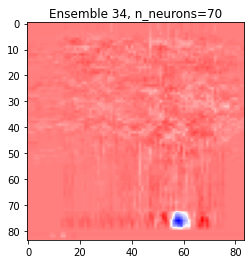

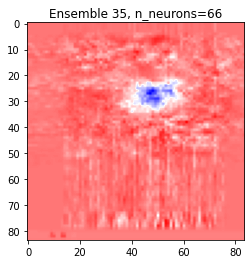

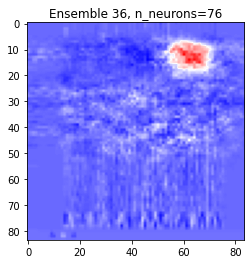

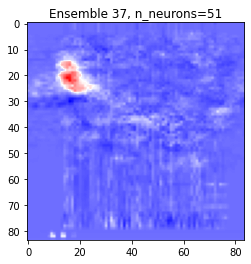

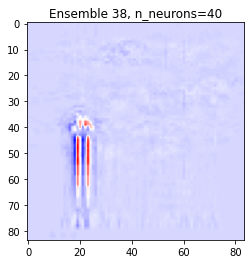

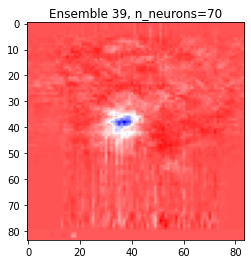

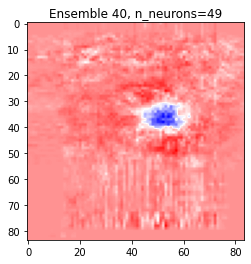

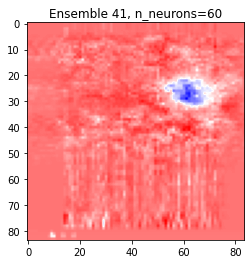

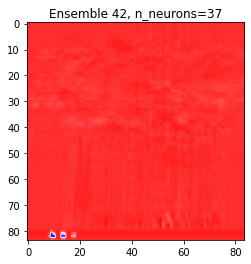

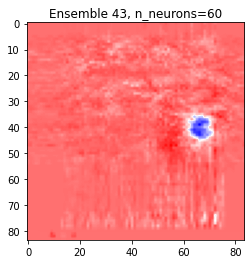

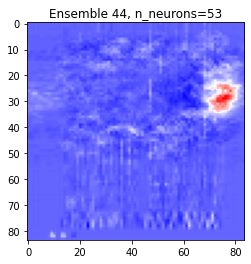

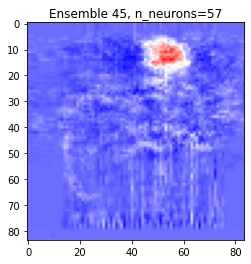

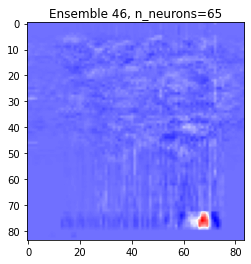

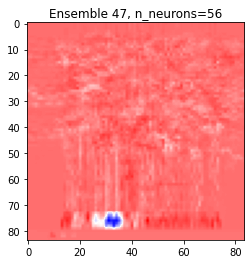

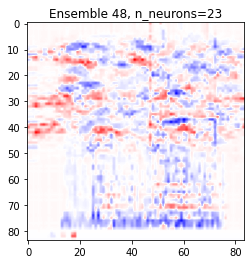

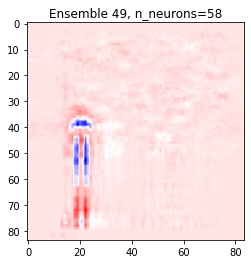

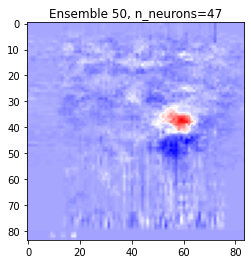

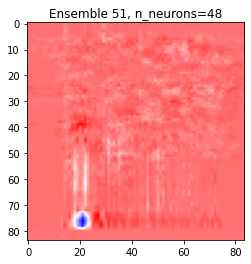

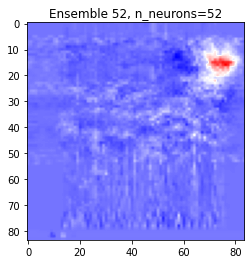

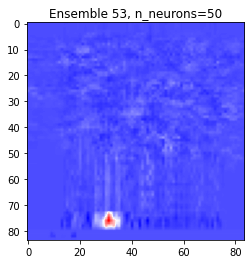

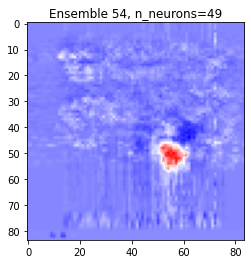

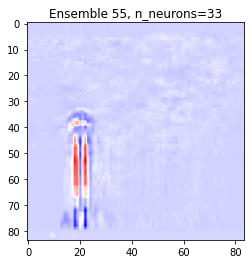

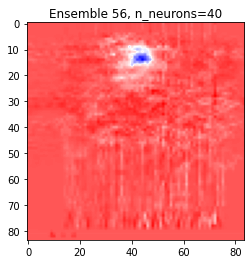

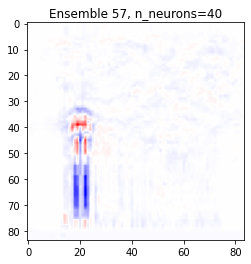

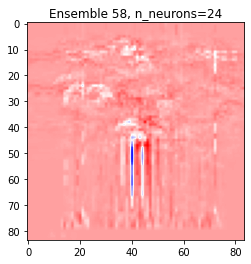

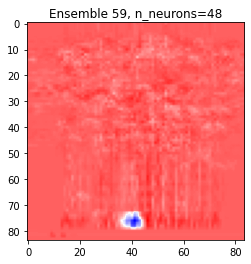

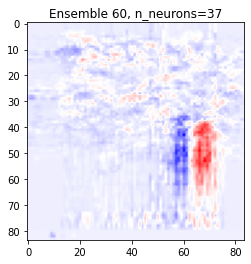

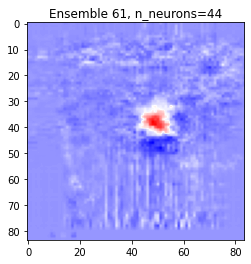

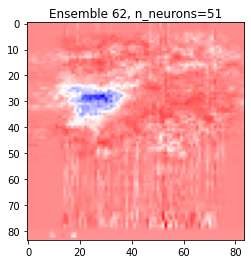

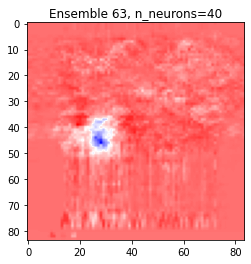

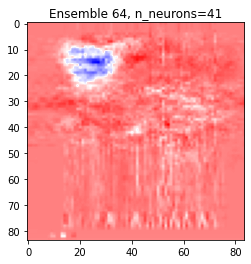

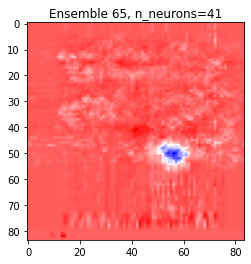

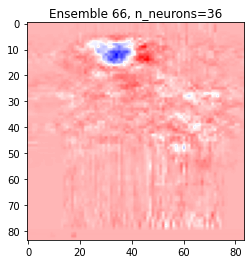

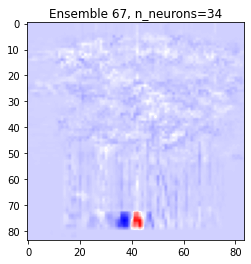

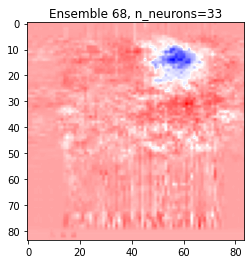

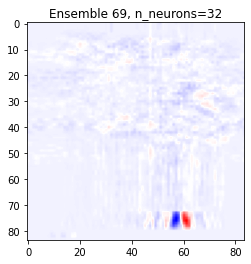

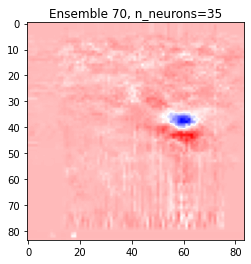

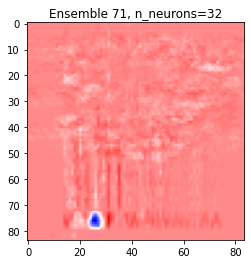

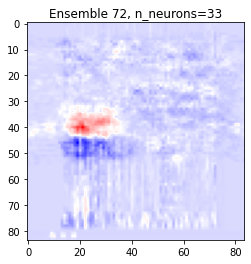

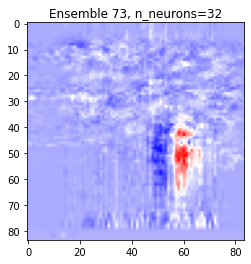

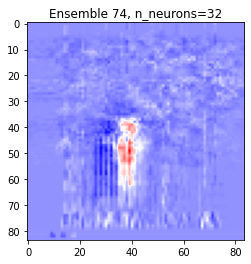

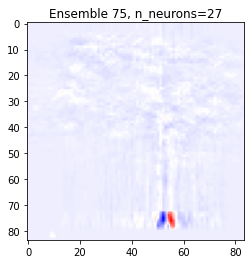

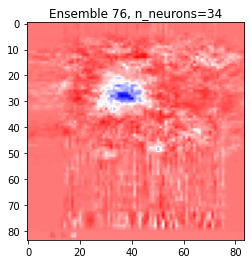

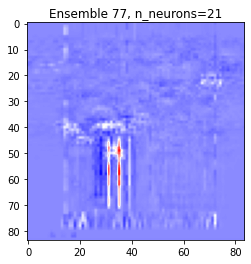

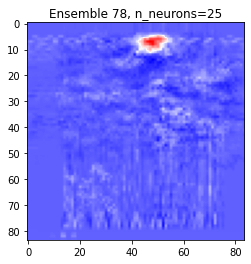

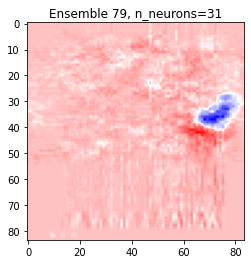

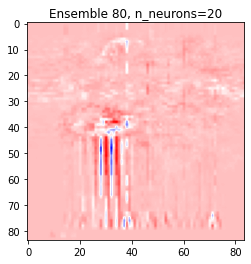

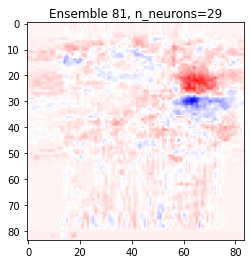

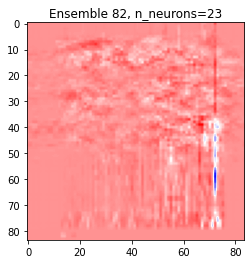

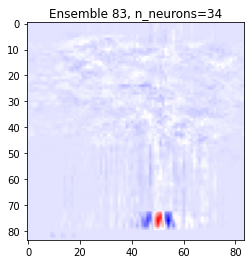

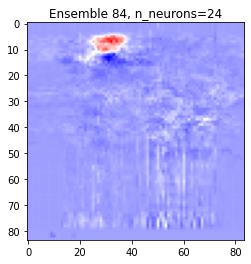

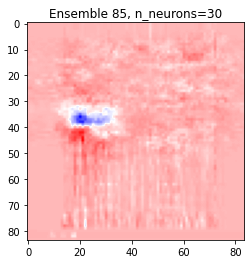

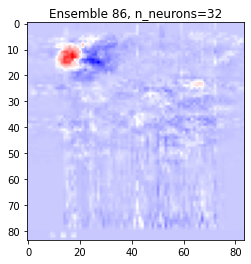

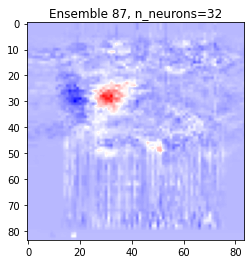

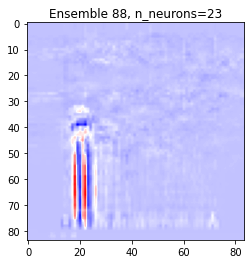

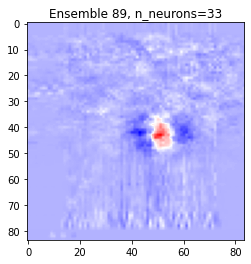

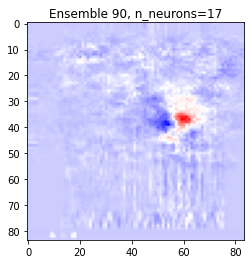

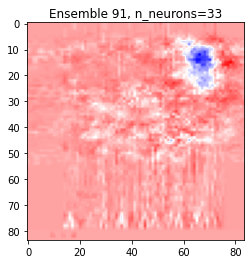

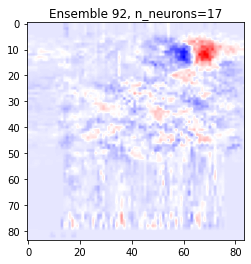

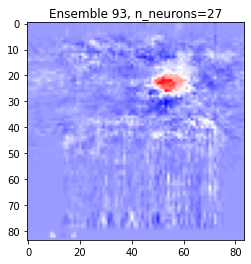

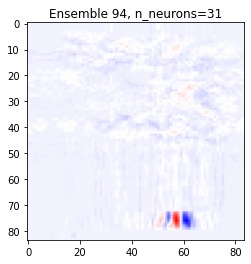

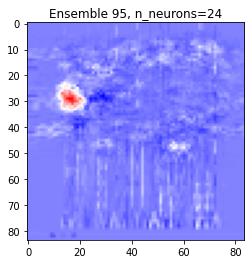

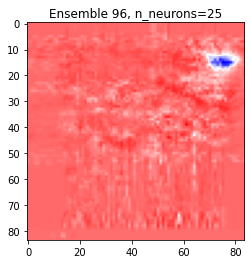

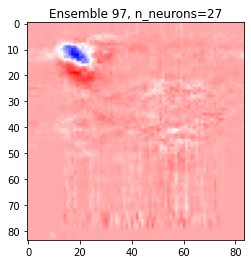

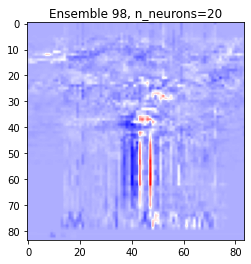

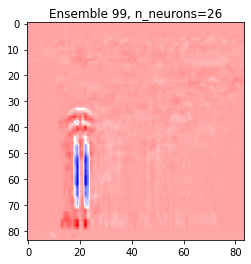

In [8]:
imgs=rl_net.im_arr
plot_receptive_fields(V,U,imgs)

In [9]:
actions=rl_net.actions_record

In [10]:
print(V.shape)

(1386, 100)


In [11]:
print(len(actions))

1386


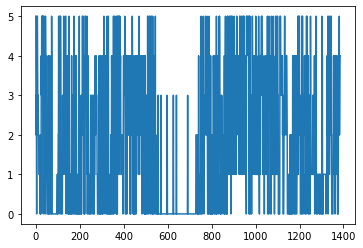

In [15]:
plt.plot(actions)